In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch
import optuna
import os
import pytorch_lightning as pl
import yaml

from Data.Drosophilla.FlyDataMod import FlyDataModule
from IPython.core.debugger import set_trace
from Models import Transformer as tr
from torch import nn as nn
from Utils import callbacks as cb
from Utils import evaluations as ev
from Utils import HyperParams as hp
from Utils import loggers as lg

np.random.seed(0)

In [2]:
label_type = "gamma"
label_val  = 10
root_dir   = "Experiments/Table_1_Window_Size"
win_sizes  = range(1,10)
if not os.path.isdir(root_dir):
    os.mkdir(root_dir)
    
dm         = FlyDataModule(cell_line="S2",
                          data_win_radius=5,
                          batch_size=1,
                          label_type=label_type,
                          label_val=label_val)
dm.setup()

Everything set


In [3]:
best_hyperparams = yaml.load(open("Experiments/Table_1_Transformer_Tunning_Gamma/BEST_HPARAMS.yaml",'r'))
for trial, data_win_radius in enumerate(win_sizes):
    logger     = lg.DictLogger(trial, root_dir)
    dm         = FlyDataModule(cell_line="S2",
                          data_win_radius=5,
                          batch_size=1,
                          label_type=label_type,
                          label_val=label_val)
    dm.setup()
    model     = tr.TransformerModule(nlayers=best_hyperparams['nlayers'],
                                    nhid=best_hyperparams['nhid'],
                                    ninp=best_hyperparams['ninp'],
                                    nhead=best_hyperparams['nhead'],
                                    lr=best_hyperparams['lr'],
                                    loss_type=best_hyperparams['loss_type'],
                                    dropout=best_hyperparams['dropout'],
                                    ntoken=best_hyperparams['ntoken'],
                                    hparams=best_hyperparams['hparams'])
    trainer = pl.Trainer(
                gpus=1,
                logger=logger,
                max_epochs=50,
                callbacks=[cb.getcb()],
                default_root_dir=root_dir)
    
    trainer.fit(model, dm)
    


<ipython-input-3-486444090d8f>:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  best_hyperparams = yaml.load(open("Experiments/Table_1_Transformer_Tunning_Gamma/BEST_HPARAMS.yaml",'r'))


Everything set
init


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


logging them hyperparams:Experiments/Table_1_Window_Size



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 364 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
364 K     Trainable params
0         Non-trainable params
364 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Everything set
init


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


logging them hyperparams:Experiments/Table_1_Window_Size



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 364 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
364 K     Trainable params
0         Non-trainable params
364 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Everything set
init


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


logging them hyperparams:Experiments/Table_1_Window_Size



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 364 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
364 K     Trainable params
0         Non-trainable params
364 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Everything set
init


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


logging them hyperparams:Experiments/Table_1_Window_Size



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 364 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
364 K     Trainable params
0         Non-trainable params
364 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Everything set
init


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


logging them hyperparams:Experiments/Table_1_Window_Size



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 364 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
364 K     Trainable params
0         Non-trainable params
364 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Everything set
init


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


logging them hyperparams:Experiments/Table_1_Window_Size



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 364 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
364 K     Trainable params
0         Non-trainable params
364 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Everything set
init


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


logging them hyperparams:Experiments/Table_1_Window_Size



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 364 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
364 K     Trainable params
0         Non-trainable params
364 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Everything set
init


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


logging them hyperparams:Experiments/Table_1_Window_Size



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 364 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
364 K     Trainable params
0         Non-trainable params
364 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Everything set
init


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


logging them hyperparams:Experiments/Table_1_Window_Size



  | Name                | Type               | Params
-----------------------------------------------------------
0 | pos_enc             | PositionalEncoding | 0     
1 | transformer_encoder | TransformerEncoder | 364 K 
2 | decoder             | Linear             | 50    
-----------------------------------------------------------
364 K     Trainable params
0         Non-trainable params
364 K     Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Everything set
init
Everything set
init
Everything set
init
Everything set
init
Everything set
init
Everything set
init
Everything set
init
Everything set
init
Everything set
init


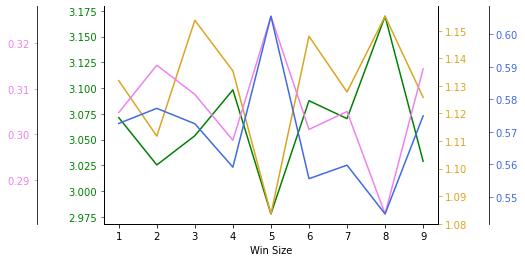

In [5]:
metrics = ['mse','mae','r2','pcc','spc']


results = np.zeros((len(metrics), len(win_sizes)))
for i, winsize in enumerate(win_sizes):
    dm         = FlyDataModule(cell_line="S2",
                          data_win_radius=5,
                          batch_size=1,
                          label_type=label_type,
                          label_val=label_val)
    dm.setup()
    layer_weights = glob.glob(root_dir+"/optuna/version_"+str(i)+"/checkpoints/*")[0]
    model = tr.TransformerModule.load_from_checkpoint(layer_weights).to("cuda:0")
    mm    = np.array(list(ev.getModelMetrics(model, dm, 'val').values()))
    results[:,i] = mm


fig, ax = plt.subplots()
twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin2.spines['left'].set_position(("axes", -0.2))
twin2.yaxis.set_label_position('left')
twin2.yaxis.set_ticks_position('left')
twin3.spines['right'].set_position(("axes", 1.15))

ax.set_xlabel("Win Size")
ax.spines['top'].set_visible(False)
twin1.spines['top'].set_visible(False)
twin2.spines['top'].set_visible(False)
twin3.spines['top'].set_visible(False)

p0, = ax.plot(results[0,:], label=metrics[0], c='green')
p1, = twin1.plot(results[1,:], label=metrics[1], c='goldenrod')
p2, = twin2.plot(results[2,:], label=metrics[2], c='violet')
p3, = twin3.plot(results[3,:], label=metrics[3], c='royalblue')

ax.set_xticks(list(range(0,len(win_sizes))))
ax.set_xticklabels(win_sizes)
ax.yaxis.label.set_color(p0.get_color())
ax.tick_params(axis='y', colors=p0.get_color())
twin1.yaxis.label.set_color(p1.get_color())
twin1.tick_params(axis='y', colors=p1.get_color())
twin2.yaxis.label.set_color(p2.get_color())
twin2.tick_params(axis='y', colors=p2.get_color())
twin3.yaxis.label.set_color(p3.get_color())
twin3.tick_params(axis='y', colors=p3.get_color())
plt.show()


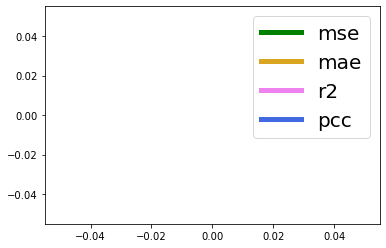

In [6]:
fig, ax = plt.subplots()
ax.plot([0], label=metrics[0], c='green', linewidth=5)
ax.plot([0], label=metrics[1], c='goldenrod', linewidth=5)
ax.plot([0], label=metrics[2], c='violet', linewidth=5)
ax.plot([0], label=metrics[3], c='royalblue', linewidth=5)
plt.legend(prop={'size': 20})
plt.show()